In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
data = pd.read_csv("/Users/ahnafchowdhury/Downloads/heart_disease_uci.csv")  


data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)


numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.drop('id', axis=1, inplace=True)

# Split features and target
X = data.drop('num', axis=1)
y = data['num']

/var/folders/79/jzlqc1gn2vzb97nsjw_fdj280000gn/T/ipykernel_31417/136391038.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/var/folders/79/jzlqc1gn2vzb97nsjw_fdj280000gn/T/ipykernel_31417/136391038.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 0.6635 - val_accuracy: 0.7635 - val_loss: 0.5360
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7537 - loss: 0.5411 - val_accuracy: 0.7770 - val_loss: 0.4695
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8297 - loss: 0.4323 - val_accuracy: 0.7905 - val_loss: 0.4544
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8222 - loss: 0.4428 - val_accuracy: 0.8041 - val_loss: 0.4517
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8178 - loss: 0.4334 - val_accuracy: 0.7905 - val_loss: 0.4533
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8003 - loss: 0.4108 - val_accuracy: 0.8041 - val_loss: 0.4527
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8503 - loss: 0.3633 - val_accuracy: 0.8108 - val_loss: 0.4495
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8422 - loss: 0.4190 - val_accuracy: 0.8108 - val_lo

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.86


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


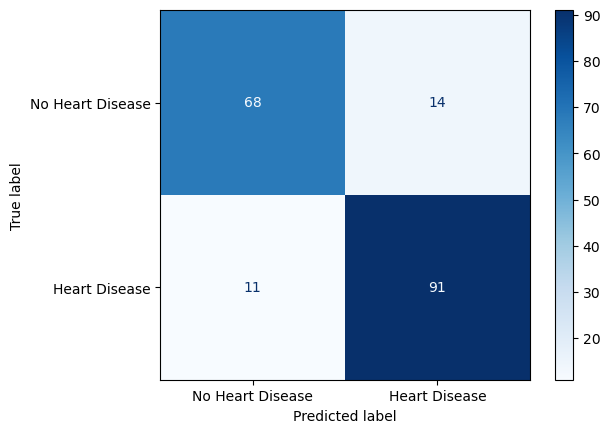

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

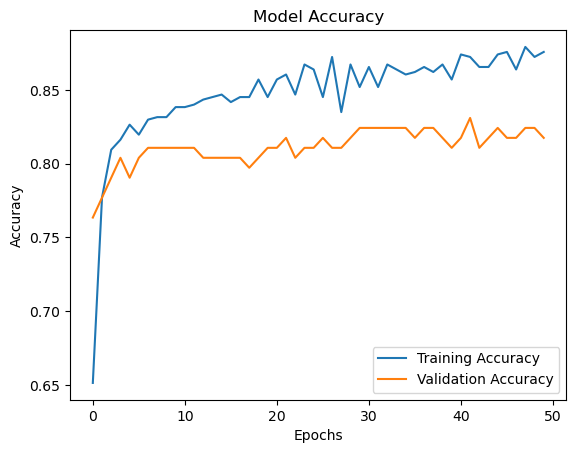

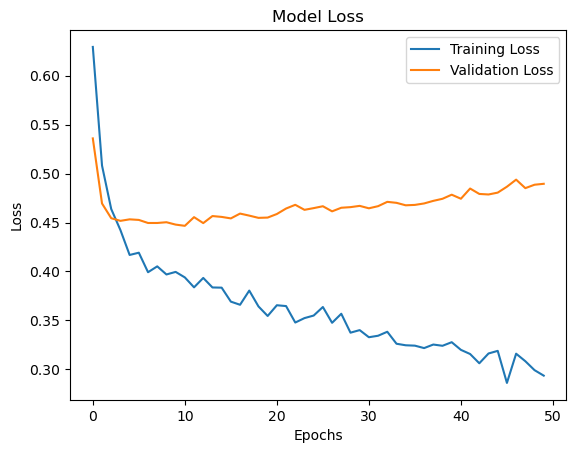

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


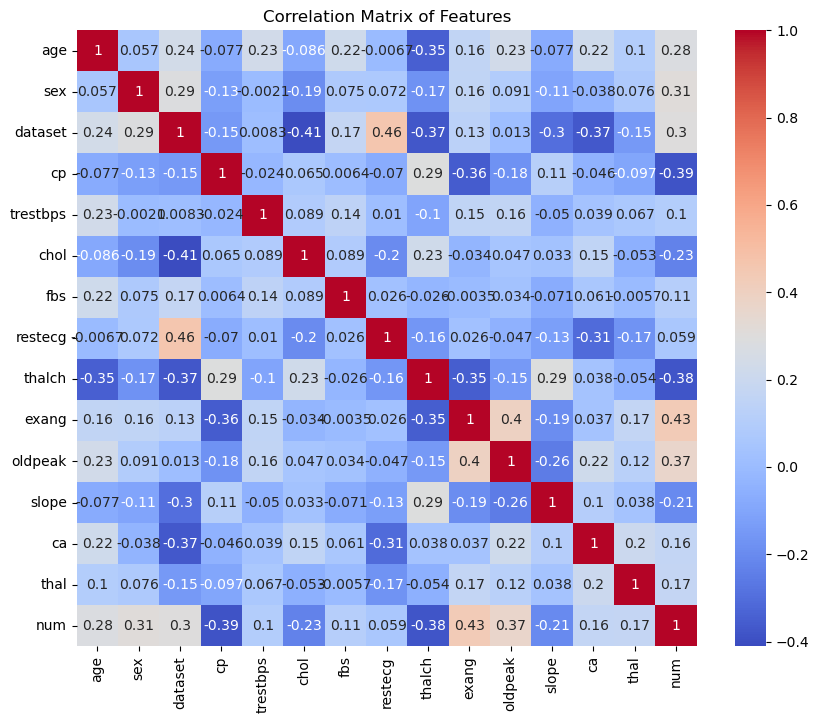

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [27]:
new_data = [[45, 1, 120, 250, 0, 2, 180, 1, 1, 1, 3, 0, 2,2]]  
new_data_scaled = scaler.transform(new_data)  
prediction = model.predict(new_data_scaled)
print(f"Prediction: {'Heart Disease' if prediction[0] > 0.5 else 'No Heart Disease'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: Heart Disease


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.87      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC-AUC Score: 0.9030368244858918


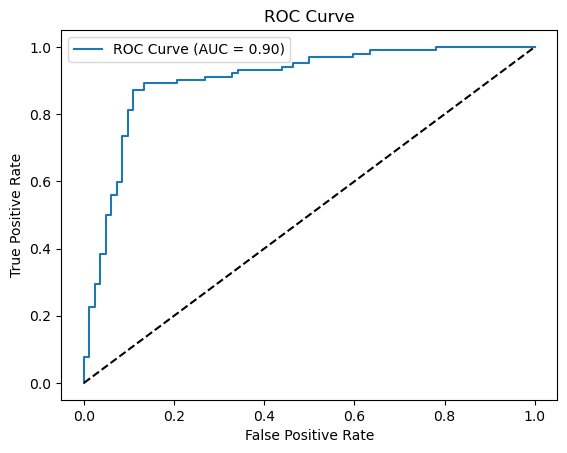

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))


roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()